# The Structural Relationship of Childcare Expenses and Workforce Attachment
## Jesús Pacheco & Dave Foote

In [5]:
#imports
import numpy as np
import pandas as pd
import scipy.stats as sts
import math
from matplotlib import pyplot as plt
import requests
import scipy.optimize as opt
from statsmodels.discrete.discrete_model import Probit
import statsmodels.api as sm
import structural_childcare as sc
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
#read data
df = pd.read_csv('../rdf_subset.csv')

In [19]:
#our functions:

def mle_beta_vec(df, xcols, init_guess, f):
    '''
    df = dataframe
    xcolumn names in list form
    init_guess in tuple form
    criterion function f
    doin the damn thing (write better comment later)
    '''
    d1, d2, d3 = categorical_split(df)
    d1 = extract_x_matrix(d1, xcols)
    d2 = extract_x_matrix(d2, xcols)
    d3 = extract_x_matrix(d3, xcols)
    data = (d1, d2, d3)
    
    results_uncstr = opt.minimize(f, init_guess, method = 'Nelder-Mead', args=data)
    
    return results_uncstr

def sum_three_criterion(beta_guess, *args):
    '''
    beta_guess comes in as array
    '''
    d1, d2, d3 = args
    
    return (logit_neglog_likelihood(beta_guess, d1, prob_1) +
            logit_neglog_likelihood(beta_guess, d2, prob_1) +
            logit_neglog_likelihood(beta_guess, d3, prob_1))

def logit_neglog_likelihood(beta_vec, *args):
    '''
    calculate the log likelihood that the probability is correct
    '''
    xm, probability_now = args
    p = probability_now(xm, beta_vec)
    rv = []
    for x in p:
        to_add = (x * math.log(x)) + ((1 - x) * math.log(1 - x))
        if to_add is not np.nan:
            rv.append(to_add)
            
    rv = pd.Series(rv)
        
    print(rv.sum())

    return -(rv.sum())

def prob_1(x_matrix, beta_vec):
    '''
    calculate probability a set of observations is a member of d1, using logit
    classification
    '''
    linear_kernel = x_matrix.dot(beta_vec)
    rv = np.exp(linear_kernel) / (1 + np.exp(linear_kernel))
    rv[rv == 1] = .999999

    return rv

def categorical_split(df):
    cond1 = (df['monthly_childcare_expenditure'] == 0)
    cond2 = (df['monthly_childcare_expenditure'] > 0)
    cond3 = (df['monthly_wage'] > 0)
    cond4 = (df['monthly_wage'] == 0)

    return df[cond1 & cond3], df[cond2 & cond3], df[cond4]

def extract_x_matrix(df, xcols):
    '''
    inputs: df with data and column names of your x variables
    output: n x k matrix of x data where n is #observations and k is
    #of columns
    '''
    
    return df[xcols].to_numpy()

In [20]:
df = pd.read_csv('../rdf_subset.csv')

In [25]:
results = mle_beta_vec(df, ['k_under2', 'criminal_records'], (.1, .1), sum_three_criterion)

-1551.6013705913474
-1105.4424303494839
-1421.6608810566458
-1551.4141619063985
-1105.305396779711
-1421.43107609189
-1551.1912952164846
-1105.1456093964969
-1421.261851496874
-1550.999742354756
-1105.0054081535723
-1421.0269061445524
-1550.6881520954842
-1104.779070744777
-1420.698598102498
-1550.4488027607065
-1104.6074394385223
-1420.516316477503
-1549.9336458604723
-1104.235031359455
-1420.030251284948
-1549.3892439451904
-1103.838547488195
-1419.4237761956767
-1548.4037380351447
-1103.123818293645
-1418.4208584478688
-1547.5173876893164
-1102.4847516039108
-1417.6379240661408
-1545.6832439579025
-1101.1580105139642
-1415.8814276777816
-1543.805964633333
-1099.795233114552
-1413.927659588042
-1540.0702097875032
-1097.0892877755123
-1410.228242565119
-1536.318706756486
-1094.3796718895883
-1406.7562963330358
-1528.3627453863692
-1088.6265633097482
-1399.1581764379528
-1520.0121238566749
-1082.57895686573
-1390.868931236415
-1502.1011871949509
-1069.6253465177717
-1373.5499207259222


-0.00047679997928250375
-0.0006541250964264998
-0.0007260786299209947
-0.0004767451692522509
-0.0006540605895341092
-0.0015408316452122932
-0.0012174508112959993
-0.0013799383631480245
-0.0007262088833096811
-0.00047683613088581663
-0.0006541676437691644
-0.0007260553323823283
-0.00047672889958336195
-0.0006540414422087628
-0.0015408316452122932
-0.0012174508112959993
-0.0013799383631480245
-0.0015408014987775978
-0.0012174297586368546
-0.0013799135844529335
-0.0007261262699803497
-0.00047677843837385997
-0.0006540997448777878
-0.001540860760371943
-0.0012174711436773178
-0.0013799622917187173
-0.001540949675379006
-0.0012175332369379981
-0.0013800353707021655
-0.0015409200324991974
-0.0012175125359873665
-0.0013800110071479034
-0.0015409438518172365
-0.0012175291700816952
-0.0013800305845136588
-0.0015408845690672586
-0.0012174877702913114
-0.0013799818599547645
-0.0007260198734136344
-0.00047670413708007
-0.0006540122991358079
-0.0015408493739872426
-0.0012174631921012863
-0.00137995

In [26]:
results

 final_simplex: (array([[ 3.64890525, 18.67577238],
       [ 3.64889448, 18.67571875],
       [ 3.64888753, 18.67567967]]), array([0.00185671, 0.00185674, 0.00185676]))
           fun: 0.0018567058039853086
       message: 'Optimization terminated successfully.'
          nfev: 164
           nit: 69
        status: 0
       success: True
             x: array([ 3.64890525, 18.67577238])

7.61437060658871

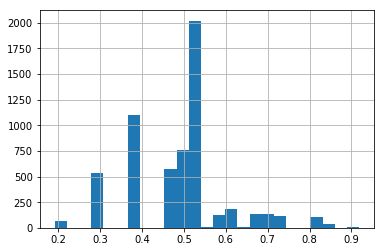

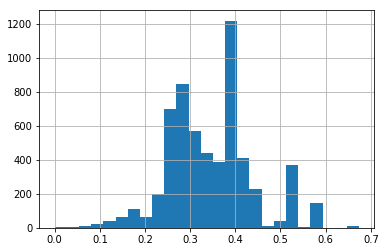

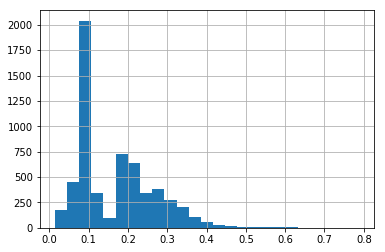

Index(['Unnamed: 0', 'ssuid', 'monthly_childcare_expenditure', 'k_under2',
       'k_3to5', 'k_6to10', 'METRO', 'reg_ratio', 'criminal_records',
       'daycare_regulations', 'monthly_job_hrs', 'monthly_wage',
       'monthly_earned_income', 'monthly_unearned_income', 'education', 'age',
       'log_expenditure', 'H', 'F', 'd1', 'd2', 'd3', 'ones', 'h_preds',
       'f_preds', 'p1', 'p2', 'p3', 'likelihood'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25eda208>,
      dtype=object)

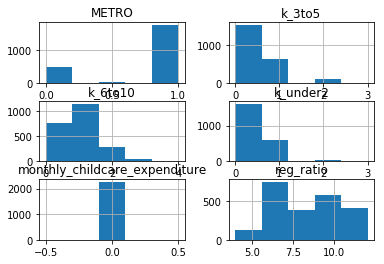